<a href="https://colab.research.google.com/github/dsliwka/EEMP2023/blob/main/ManagementPracticesClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
!pip install Stargazer
from stargazer.stargazer import Stargazer

from sklearn.utils import resample


In [ ]:
path_to_data = 'https://raw.githubusercontent.com/dsliwka/EEMP2023/main/Data/AMP_Data.csv'
df = pd.read_csv(path_to_data)


In [ ]:
df

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_country,mne_d,...,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent
0,0,1,0.374976,0.634742,0.000000,3.0,3.00,3.500000,NaN,0,...,18.00,0,1,0,0,0,1,88585.01,403.00003,10828.998
1,1,1,0.626065,0.460456,0.000000,4.0,4.00,3.333333,NaN,0,...,18.00,0,1,0,0,0,1,116900.99,405.00003,9241.004
2,2,1,0.032071,0.286170,4.366278,5.0,5.00,3.166667,NaN,0,...,18.00,0,0,0,0,0,0,103448.01,410.00000,8946.000
3,3,2,0.227196,2.285633,0.000000,4.5,4.50,4.555555,NaN,0,...,15.00,0,0,0,0,0,1,246291.10,670.99994,69757.984
4,4,3,0.213310,1.911630,0.000000,3.5,4.00,4.333333,NaN,0,...,14.00,0,1,0,0,0,1,454517.12,1627.00000,89360.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,7089,2926,0.526407,0.791786,3.919783,2.5,3.75,3.583333,NaN,0,...,19.75,0,0,0,0,0,0,262517.03,1313.00010,60770.004
7090,7090,2926,0.637338,0.808551,3.832232,3.0,3.50,3.611111,NaN,0,...,18.50,0,0,0,0,0,0,279724.94,1303.00020,60550.000
7091,7091,2926,0.355583,0.825316,3.744681,3.5,3.25,3.638889,NaN,0,...,17.25,0,0,0,0,0,0,245282.00,1164.99990,59896.016
7092,7092,2926,0.278019,0.842080,3.657131,4.0,3.00,3.666667,NaN,0,...,16.00,0,0,0,0,0,0,244552.10,1393.99990,67418.016


<Axes: xlabel='management', ylabel='Count'>

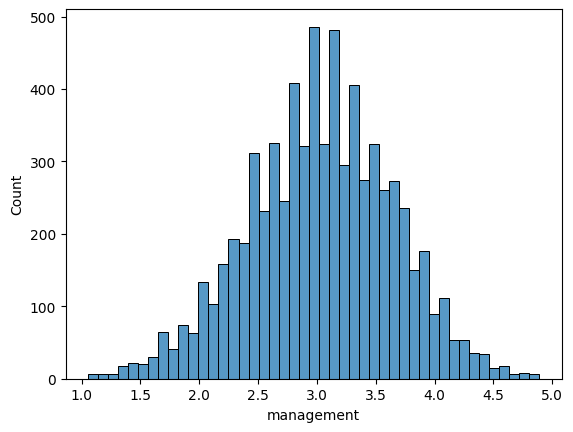

In [ ]:
sns.histplot(df.management)

<Axes: xlabel='management', ylabel='roce'>

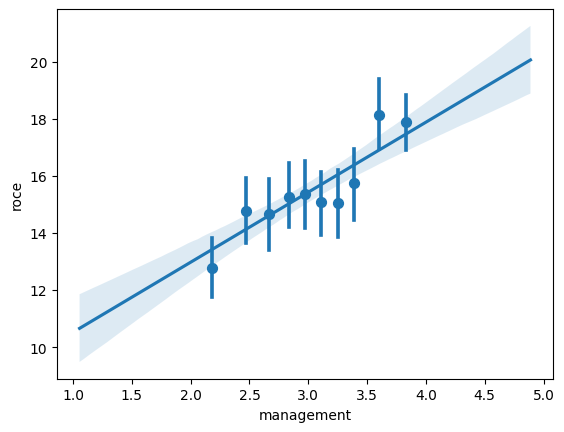

In [ ]:
sns.regplot(x="management", y="roce", x_bins=10, data=df)

In [ ]:
reg=smf.ols("roce ~ management", data=df).fit()
##print(summary_col([reg], stars=True))
Stargazer([reg])

In [ ]:
df["ChinaD"]=(df.country=="China")
df.ChinaD.describe()

count      7094
unique        2
top       False
freq       6519
Name: ChinaD, dtype: object

<Axes: xlabel='management', ylabel='country'>

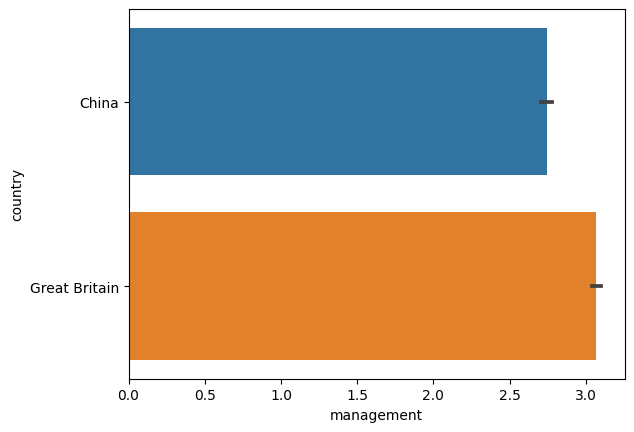

In [ ]:
#dfn=df[df.country.isin(["Great Britain","China"])]
dfn=df[(df.country=="Great Britain")|(df.country=="China")]

sns.barplot(y="country", x="management", data=dfn)

In [ ]:
reg1=smf.ols("roce ~ management", data=dfn).fit()
reg2=smf.ols("roce ~ management * ChinaD", data=dfn).fit()
reg3=smf.ols("roce ~ management", data=dfn[df.country=="Great Britain"]).fit()
reg4=smf.ols("roce ~ management", data=dfn[df.country=="China"]).fit()

##print(reg2.summary())
##print(summary_col([reg,reg2], stars=True, regressor_order=["management", "ChinaD[T.True]", "management:ChinaD[T.True]"]))

tab=Stargazer([reg1,reg2,reg3,reg4])
tab.covariate_order(["management", "ChinaD[T.True]", "management:ChinaD[T.True]", "Intercept"])
tab.rename_covariates({"management": "Management","ChinaD[T.True]": "China", "management:ChinaD[T.True]": "Management x China"})
tab

<ipython-input-57-4973d5e35998>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg3=smf.ols("roce ~ management", data=dfn[df.country=="Great Britain"]).fit()
<ipython-input-57-4973d5e35998>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg4=smf.ols("roce ~ management", data=dfn[df.country=="China"]).fit()


<Axes: xlabel='management', ylabel='roce'>

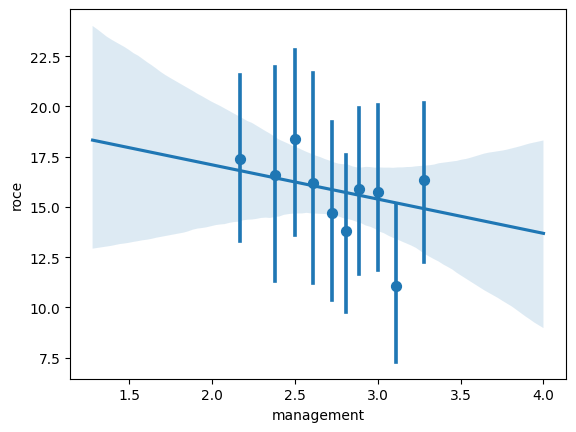

In [ ]:
sns.regplot(x="management", y="roce", x_bins=10, data=dfn[dfn.country=="China"])


<Axes: xlabel='management', ylabel='roce'>

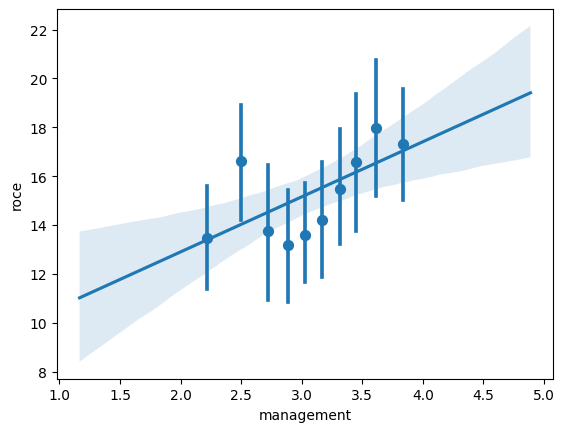

In [ ]:
sns.regplot(x="management", y="roce", x_bins=10, data=dfn[dfn.country=="Great Britain"])

<Axes: xlabel='management', ylabel='roce'>

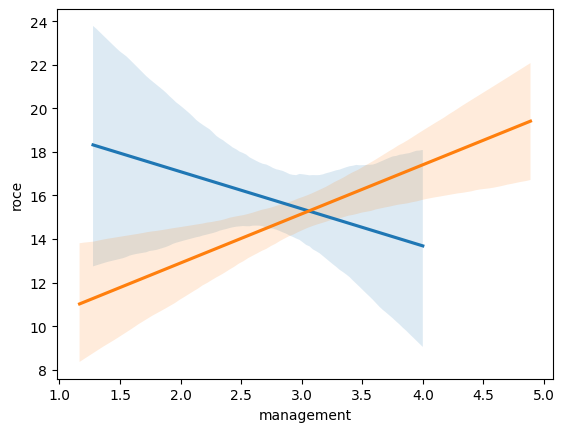

In [ ]:
sns.regplot(x="management", y="roce", x_bins=10, scatter=False, data=dfn[dfn.country=="China"])
sns.regplot(x="management", y="roce", x_bins=10, scatter=False, data=dfn[dfn.country=="Great Britain"])